In [1]:
# This notebook illustrates the halfar ice model

# Import funman related code
import os
from pathlib import Path
from funman import FunmanResults
import json
from funman import Point, Box, Parameter
from typing import List, Dict
from funman.api.run import Runner

RESOURCES = os.path.join(
   os.getcwd(), "../../resources"
)
EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "halfar")
MODEL_PATH = os.path.join(EXAMPLE_DIR, "halfar.json")
REQUEST_PATH = os.path.join(EXAMPLE_DIR, "halfar_request.json")


def summarize_results(variables, results):
   points = results.points()
   boxes = results.parameter_space.boxes()

   print(
      f"{len(points)} Points (+:{len(results.parameter_space.true_points())}, -:{len(results.parameter_space.false_points())}), {len(boxes)} Boxes (+:{len(results.parameter_space.true_boxes)}, -:{len(results.parameter_space.false_boxes)})"
   )
   if points and len(points) > 0:
      point: Point = points[-1]
      parameters: Dict[Parameter, float] = results.point_parameters(point)
      results.plot(variables=variables, label_marker={"true":",", "false": ","},  xlabel="Time", ylabel="Height", legend=variables,label_color={"true": "g", "false":"r"})
      print(f"A = {results.parameter_space.points()[0].values['A']:.5f}")
      print(parameters)
      print(results.dataframe([point]))
   else:
      # if there are no points, then we have a box that we found without needing points
      box = boxes[0]
      print(json.dumps(box.explain(), indent=4))


# %load_ext autoreload
# %autoreload 2

In [ ]:
(  b((h_1_1 == ( (A * (7.09255e+10 * (h_3_0 * pow(h_2_0, 5) ) - 7.09255e+10 )))))  )

2023-12-05 04:55:31,763 - funman.server.worker - INFO - FunmanWorker running...
2023-12-05 04:55:31,772 - funman.server.worker - INFO - Starting work on: 47774a33-689b-49a1-ae56-30218efa8761


2023-12-05 04:55:33,779 - funman.api.run - INFO - Dumping results to ./out/47774a33-689b-49a1-ae56-30218efa8761.json
2023-12-05 04:55:38,625 - funman_dreal.solver - DEBUG - Created new Solver ...
2023-12-05 04:55:38,628 - funman.search.box_search - DEBUG - Expander_S_p2353983 entering process loop
2023-12-05 04:55:38,630 - funman.search.box_search - DEBUG - Expanding box: Box(
|+pts|: 0
|-pts|: 0
label: unknown
width: 1.299999999999999646696247305E-10,
timepoints: [0.00000, 9.00000],
A:	[0.00000, 0.00000)	(1.00000)
timestep:	[0.00000, 9.00000]	(1.00000)
)
2023-12-05 04:55:38,641 - funman.search.box_search - DEBUG - 

2023-12-05 04:55:38,649 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 0 to 1
2023-12-05 04:55:38,856 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 1 to 2
2023-12-05 04:55:38,948 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 2 to 3
2023-12-05 04:55:39,058 - /root/funman/src/funman/translate/pet

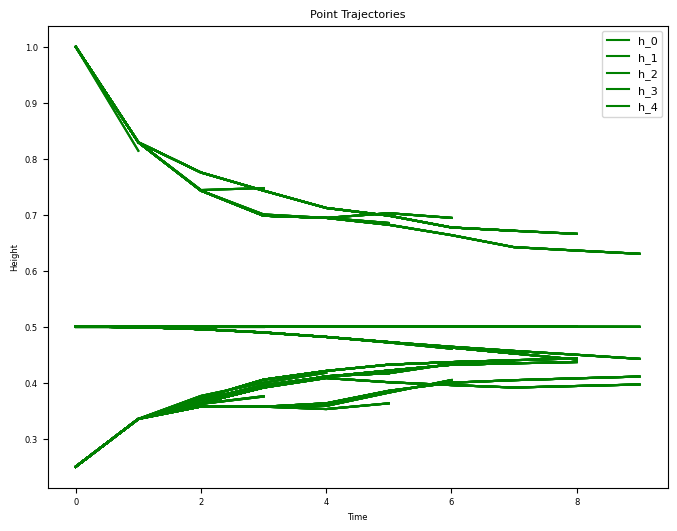

2023-12-05 04:57:30,058 - funman.api.run - INFO - Creating plot of parameter space: ./out/47774a33-689b-49a1-ae56-30218efa8761_parameter_space.png
2023-12-05 04:57:30,333 - funman.search.box_search - DEBUG - True @ 9.0
2023-12-05 04:57:30,337 - funman.search.box_search - INFO - progress: 0.98281
2023-12-05 04:57:30,340 - funman.search.box_search - DEBUG - Expanding box: Box(
|+pts|: 0
|-pts|: 0
label: unknown
width: 2.031250000000028528531296481E-12,
timepoints: [9.00000, 9.00000],
A:	[0.00000, 0.00000)	(0.01563)
timestep:	[9.00000, 9.00000]	(0.00000)
)
2023-12-05 04:57:30,344 - funman.search.box_search - DEBUG - 
0{0}:	[+]
1{1}:	[+]
2{2}:	[+]
3{3}:	[+]
4{4}:	[+]
5{5}:	[+]
6{6}:	[+]
7{7}:	[+]
8{8}:	[+]
9{9}:	[+++++++++++++++]
2023-12-05 04:57:30,541 - funman_dreal.converter - DEBUG - Extracting dreal unsat core expression: (solve_step_0 and disj1637 and solve_step_9 and solve_step_8 and solve_step_7 and solve_step_6 and solve_step_5 and solve_step_4 and solve_step_3 and solve_step_2 an

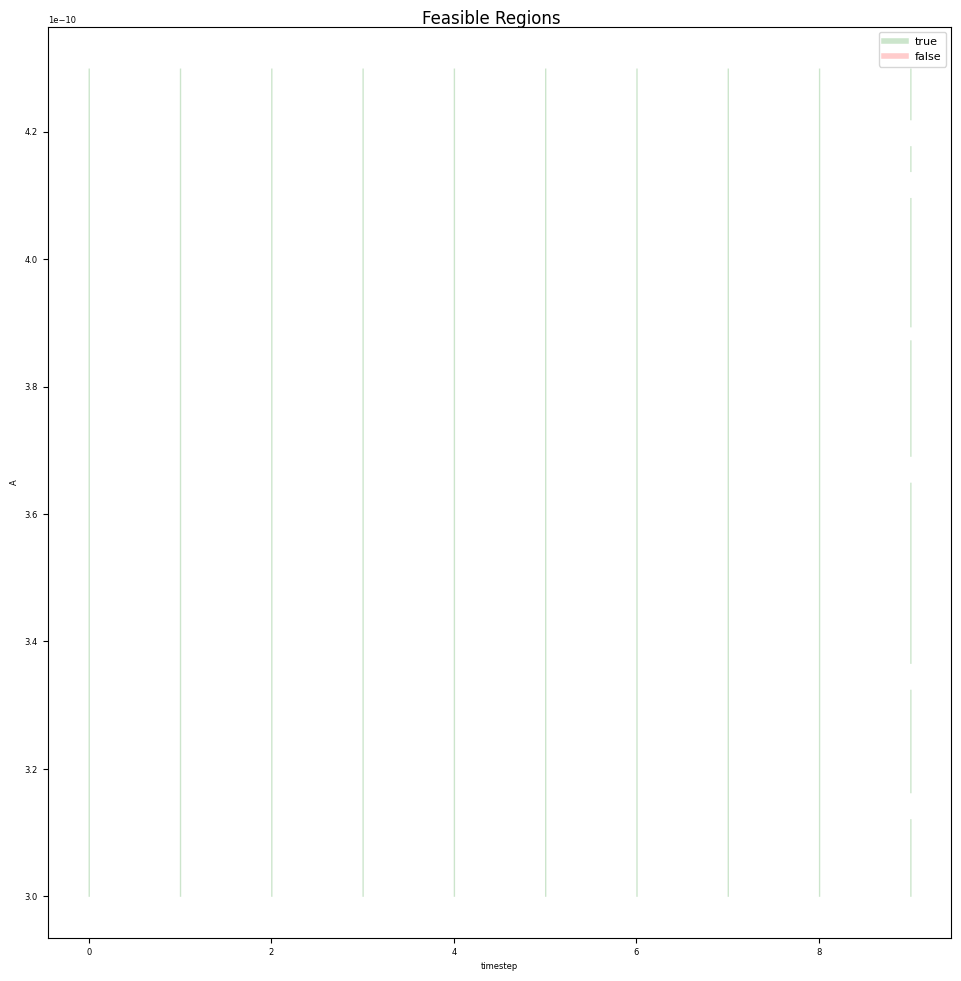

2023-12-05 04:57:40,386 - funman.search.box_search - DEBUG - True @ 9.0
2023-12-05 04:57:40,390 - funman.search.box_search - INFO - progress: 0.99531
2023-12-05 04:57:40,393 - funman.search.box_search - DEBUG - Expanding box: Box(
|+pts|: 0
|-pts|: 0
label: unknown
width: 5.078125000000071321328241203E-13,
timepoints: [9.00000, 9.00000],
A:	[0.00000, 0.00000)	(0.00391)
timestep:	[9.00000, 9.00000]	(0.00000)
)
2023-12-05 04:57:40,396 - funman.search.box_search - DEBUG - 
0{0}:	[+]
1{1}:	[+]
2{2}:	[+]
3{3}:	[+]
4{4}:	[+]
5{5}:	[+]
6{6}:	[+]
7{7}:	[+]
8{8}:	[+]
9{9}:	[++++++++++++++++++++++++++]
2023-12-05 04:57:40,681 - funman_dreal.converter - DEBUG - Extracting dreal unsat core expression: (solve_step_0 and disj1637 and solve_step_9 and solve_step_8 and solve_step_7 and solve_step_6 and solve_step_5 and solve_step_4 and solve_step_3 and solve_step_2 and solve_step_1 and disj1657 and disj1677 and disj1697 and disj1717 and disj1737 and disj1757 and disj1777 and disj1797 and disj1817 and 

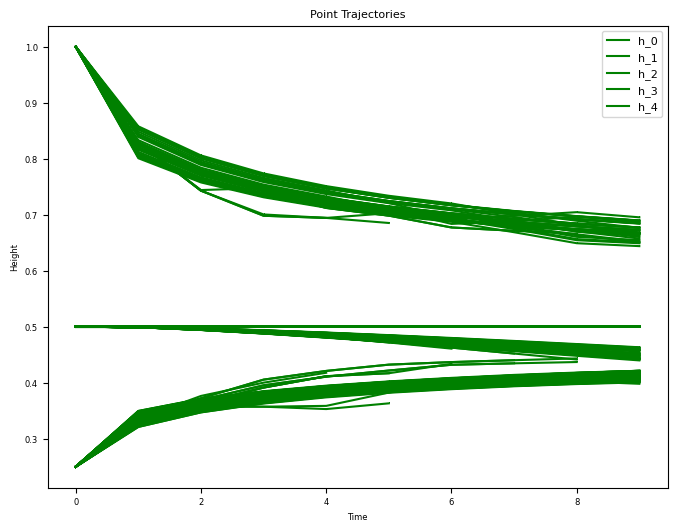

2023-12-05 04:57:53,941 - funman.api.run - INFO - Creating plot of parameter space: ./out/47774a33-689b-49a1-ae56-30218efa8761_parameter_space.png


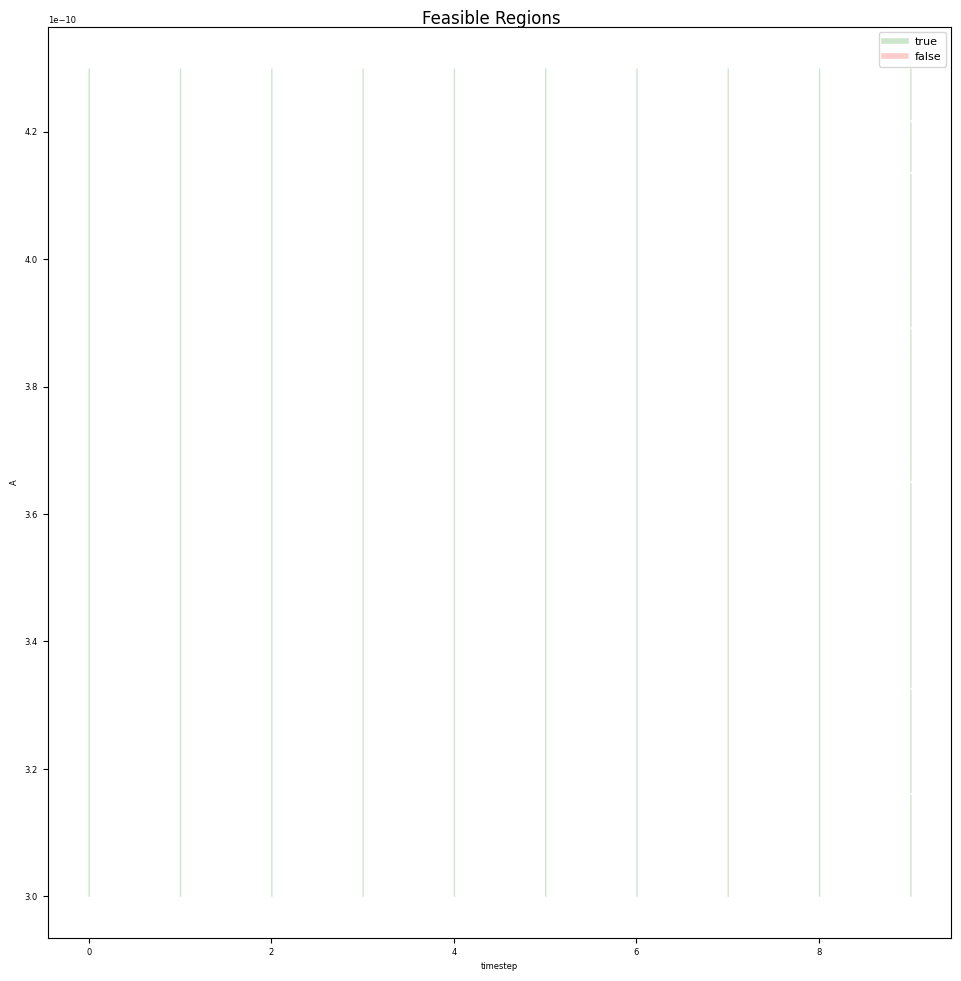

2023-12-05 04:58:04,555 - funman.server.worker - INFO - Worker.stop() acquiring state lock ....
2023-12-05 04:58:04,980 - funman.server.worker - INFO - FunmanWorker exiting...
2023-12-05 04:58:04,983 - funman.server.worker - INFO - Worker.stop() completed.


47 Points (+:47, -:0), 47 Boxes (+:47, -:0)
A = 0.00000
{A[3.0000000000000005e-10, 4.3e-10): 4.259375e-10}
                 A       h_0       h_1       h_2       h_3       h_4  id label
time                                                                          
0.0   4.259375e-10  0.250000  0.500000  1.000000  0.500000  0.250000   0  true
1.0   4.259375e-10  0.349569  0.499078  0.800863  0.500000  0.349569   0  true
2.0   4.259375e-10  0.371072  0.494176  0.757658  0.500000  0.371271   0  true
3.0   4.259375e-10  0.383951  0.487761  0.731145  0.500000  0.384905   0  true
4.0   4.259375e-10  0.392713  0.480441  0.712549  0.499997  0.394738   0  true
5.0   4.259375e-10  0.399103  0.472603  0.698513  0.499986  0.402384   0  true
6.0   4.259375e-10  0.404000  0.464501  0.687356  0.499960  0.408643   0  true
7.0   4.259375e-10  0.407914  0.456293  0.668741  0.499906  0.413984   0  true
8.0   4.259375e-10  0.410778  0.448051  0.649118  0.499817  0.418140   0  true
9.0   4.259375e-10  0.41

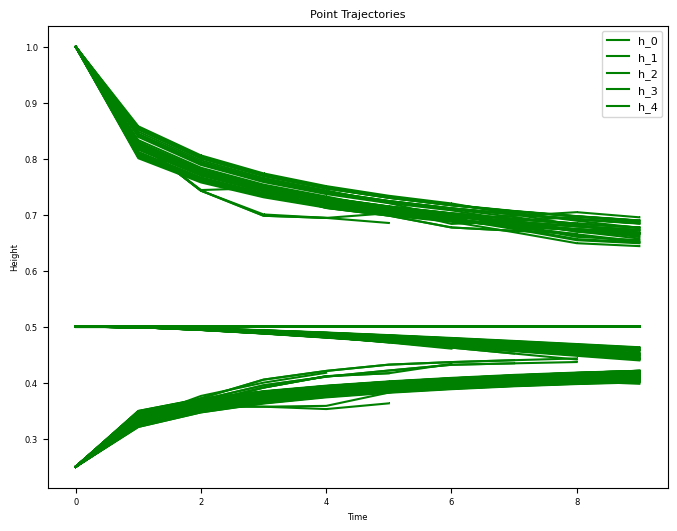

In [8]:
# Use a five point model with no constraints

num_disc = 5

MODEL_PATH = os.path.join("../../resources/amr/halfar/hand_generated", f"halfar_{num_disc}.json")

variables = [f"h_{d}" for d in range(num_disc)]
height_bounds = [
            {"name": f"pos_{i}",
         "variable": i,
         "interval": {"lb": 0, "ub": 1.01}
         }
    for i in variables
]

request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0,10, 1)}
            ],
        },
        
    ],
    "parameters":[
        {"name": "A",
         "label":"all",
         "interval": {"lb":3e-10, "ub":4.3e-10}}
        # "interval": {"lb":0, "ub":1}}
    ],
    "constraints": height_bounds + 
    [
        {"name": "LHS_slope",
            "variables": ["h_1", "h_0"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }, 
        {"name": "RHS_slope",
            "variables": ["h_3", "h_4"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }


    #  {"name": "melt_h_5",
    #      "variable": "h_5",
    #      "interval": {"lb": 0, "ub": .8},
    #      "timepoints": {"lb": 5}
    #     },

        ],
    "config": {
        # "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        # "tolerance": 1e-3,
        "verbosity": 10,
        # "dreal_mcts": False,
        # "dreal_precision": 0.1,
        # "save_smtlib": "./out",
        # "substitute_subformulas": False,
        # "series_approximation_threshold": None,
        # "dreal_log_level": "info",
        # "profile": False,
    },
}


# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
    dump_plot=True,
    parameters_to_plot=["A", "timestep"],
    point_plot_config={"variables":variables, "label_marker":{"true":",", "false": ","},  "xlabel":"Time", "ylabel":"Height", "legend":variables,"label_color":{"true": "g", "false":"r"}},
    num_points=None,
    
)

summarize_results(variables, results)




In [ ]:
results.dataframe(points=results.parameter_space.points()[4:])

In [ ]:
# Use a five point model with no constraints

num_disc = 10

MODEL_PATH = os.path.join("../..", f"halfar_{num_disc}.json")

height_bounds = [
            {"name": f"pos_h_{i}",
         "variable": f"h_{i}",
         "interval": {"lb": 0, "ub": 1.01}
         },
    for i in range(num_disc)
]

request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0, 10, 1)}
            ],
        },
        
    ],
    "parameters":[
        {"name": "A",
         "label":"all",
        #  "interval": {"lb":1e-18, "ub":1e-14}}
        "interval": {"lb":0, "ub":1}}
    ],
    "constraints": 
    height_bounds + [
   
        {"name": "LHS_slope",
            "variables": ["h_1", "h_0"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }, 
        {"name": "RHS_slope",
            "variables": ["h_8", "h_9"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }


    #  {"name": "melt_h_5",
    #      "variable": "h_5",
    #      "interval": {"lb": 0, "ub": .8},
    #      "timepoints": {"lb": 5}
    #     },

        ],
    "config": {
        "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-5,
        "verbosity": 10,
        "dreal_mcts": True,
        # "dreal_precision": 1,
        # "save_smtlib": "halfar.smt2",
        "substitute_subformulas": False,
        "series_approximation_threshold": None,
        "dreal_log_level": "none",
        "profile": False,
    },
}
variables = [f"h_{d}" for d in range(num_disc)]

# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
    dump_plot=True,
    parameters_to_plot=["A", "timestep"],
    point_plot_config={"variables":variables, "label_marker":{"true":",", "false": ","},  "xlabel":"Time", "ylabel":"Height", "legend":variables,"label_color":{"true": "g", "false":"r"}},
    num_points=None
)

summarize_results(variables, results)




In [ ]:
# Use a five point model with no constraints

num_disc = 5
MODEL_PATH = os.path.join("../..", f"halfar_{num_disc}.json")


request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0, 20, 1)}
            ],
        },
        
    ],
    "parameters":[
        {"name": "gamma",
         "label":"all",
         "interval": {"lb":0, "ub":0.5}}
    ],
    "constraints": [
        {"name": "pos_h_0",
         "variable": "h_0",
         "interval": {"lb": 0}
         },
        {"name": "pos_h_1",
         "variable": "h_1",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_2",
         "variable": "h_2",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_3",
         "variable": "h_3",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_4",
         "variable": "h_4",
         "interval": {"lb": 0}
        },
        {"name": "LHS_slope",
            "variables": ["h_1", "h_0"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }, 
        {"name": "RHS_slope",
            "variables": ["h_3", "h_4"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }


    #  {"name": "melt_h_5",
    #      "variable": "h_5",
    #      "interval": {"lb": 0, "ub": .8},
    #      "timepoints": {"lb": 5}
    #     },

        ],
    "config": {
        "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-5,
        "verbosity": 30,
        "dreal_mcts": True,
        "dreal_precision": 1,
        # "save_smtlib": "halfar.smt2",
        "substitute_subformulas": False,
        "series_approximation_threshold": None,
        "dreal_log_level": "none",
        "profile": False,
    },
}
variables = [f"h_{d}" for d in range(num_disc)]
   
# points = results.points()
# boxes = results.parameter_space.boxes()

# print(
#     f"{len(points)} Points (+:{len(results.parameter_space.true_points())}, -:{len(results.parameter_space.false_points())}), {len(boxes)} Boxes (+:{len(results.parameter_space.true_boxes)}, -:{len(results.parameter_space.false_boxes)})"
# )

# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
    dump_plot=True,
    parameters_to_plot=["gamma", "timestep"],
    point_plot_config={"variables":variables, "label_marker":{"true":",", "false": ","},  "xlabel":"Time", "ylabel":"Height", "legend":variables,"label_color":{"true": "g", "false":"r"}},
    num_points=1
)
# summarize_results(num_disc, results)




In [ ]:
# Use a ten point model with no constraints

num_disc = 10
MODEL_PATH = os.path.join("../..", f"halfar_{num_disc}.json")


request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0, 25, 1)}
            ],
        },
        
    ],
    "parameters":[
        {"name": "gamma",
         "label":"all",
         "interval": {"lb":0, "ub":0.5}}
    ],
    "constraints": [        
        {"name": "pos_h_0",
         "variable": "h_0",
         "interval": {"lb": 0}
         },
        {"name": "pos_h_1",
         "variable": "h_1",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_2",
         "variable": "h_2",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_3",
         "variable": "h_3",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_4",
         "variable": "h_4",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_5",
         "variable": "h_5",
         "interval": {"lb": 0}
         },
        {"name": "pos_h_6",
         "variable": "h_6",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_7",
         "variable": "h_7",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_8",
         "variable": "h_8",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_9",
         "variable": "h_9",
         "interval": {"lb": 0}
        },
        {"name": "LHS_slope",
            "variables": ["h_1", "h_0"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }, 
        {"name": "RHS_slope",
            "variables": ["h_8", "h_9"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }

        ],
    "config": {
               "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-5,
        "verbosity": 30,
        "dreal_mcts": True,
        "dreal_precision": 1,
        # "save_smtlib": "halfar.smt2",
        "substitute_subformulas": False,
        "series_approximation_threshold": None,
        "dreal_log_level": "none",
        "profile": False,
    },
}
variables = [f"h_{d}" for d in range(num_disc)]
# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
    dump_plot=True,
    parameters_to_plot=["gamma", "timestep"],
    point_plot_config={"variables":variables, "label_marker":{"true":",", "false": ","},  "xlabel":"Time", "ylabel":"Height", "legend":variables,"label_color":{"true": "g", "false":"r"}},
    num_points=1
)

In [ ]:
# Use a ten point model with no constraints

num_disc = 20
MODEL_PATH = os.path.join("../..", f"halfar_{num_disc}.json")


request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0, 25, 1)}
            ],
        },
        
    ],
    "parameters":[
        {"name": "gamma",
         "label":"all",
         "interval": {"lb":0, "ub":0.5}}
    ],
    "constraints": [        
        {"name": "pos_h_0",
         "variable": "h_0",
         "interval": {"lb": 0}
         },
        {"name": "pos_h_1",
         "variable": "h_1",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_2",
         "variable": "h_2",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_3",
         "variable": "h_3",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_4",
         "variable": "h_4",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_5",
         "variable": "h_5",
         "interval": {"lb": 0}
         },
        {"name": "pos_h_6",
         "variable": "h_6",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_7",
         "variable": "h_7",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_8",
         "variable": "h_8",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_9",
         "variable": "h_9",
         "interval": {"lb": 0}
        },
                {"name": "pos_h_10",
         "variable": "h_10",
         "interval": {"lb": 0}
         },
        {"name": "pos_h_11",
         "variable": "h_11",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_12",
         "variable": "h_12",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_13",
         "variable": "h_13",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_14",
         "variable": "h_14",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_15",
         "variable": "h_15",
         "interval": {"lb": 0}
         },
        {"name": "pos_h_16",
         "variable": "h_16",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_17",
         "variable": "h_17",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_18",
         "variable": "h_18",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_19",
         "variable": "h_19",
         "interval": {"lb": 0}
        },
        {"name": "LHS_slope",
            "variables": ["h_1", "h_0"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }, 
        {"name": "RHS_slope",
            "variables": ["h_18", "h_19"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }

        ],
    "config": {
               "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-5,
        "verbosity": 30,
        "dreal_mcts": True,
        "dreal_precision": 1,
        # "save_smtlib": "halfar.smt2",
        "substitute_subformulas": False,
        "series_approximation_threshold": None,
        "dreal_log_level": "none",
        "profile": False,
    },
}
variables = [f"h_{d}" for d in range(num_disc)]
# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
    dump_plot=True,
    parameters_to_plot=["gamma", "timestep"],
    point_plot_config={"variables":variables, "label_marker":{"true":",", "false": ","},  "xlabel":"Time", "ylabel":"Height", "legend":variables,"label_color":{"true": "g", "false":"r"}},
    num_points=1
)

In [ ]:
# Use a five point model with no constraints

num_disc = 10
# MODEL_PATH = os.path.join("../..", f"halfar_{num_disc}.json")


request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0, 5, 1)}
            ],
        },
        
    ],
    "constraints": [
        {"name": "non-negative_h_0",
         "variable": "h_0",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
         },
        {"name": "non-negative_h_1",
         "variable": "h_1",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non-negative_h_2",
         "variable": "h_2",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non-negative_h_3",
         "variable": "h_3",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non-negative_h_4",
         "variable": "h_4",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        # {"name": "LHS_slope",
        #     "variables": ["h_1", "h_0"],
        #     "weights": [1, -1],
        #     "additive_bounds": {"lb": 0},
        #     "timepoints": {"lb": 0}
        # }, 
        # {"name": "RHS_slope",
        #     "variables": ["h_3", "h_4"],
        #     "weights": [1, -1],
        #     "additive_bounds": {"lb": 0},
        #     "timepoints": {"lb": 0}
        # }


    #  {"name": "melt_h_5",
    #      "variable": "h_5",
    #      "interval": {"lb": 0, "ub": .8},
    #      "timepoints": {"lb": 5}
    #     },

        ],
    "config": {
        "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-1,
        "verbosity": 10,
        "dreal_mcts": True,
        "dreal_precision": 0.1,
        # "save_smtlib": "halfar.smt2",
        "substitute_subformulas": False,
        "series_approximation_threshold": None,
        "dreal_log_level": "none",
        "profile": False,
    },
}

# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
)
summarize_results(num_disc, results)




In [ ]:
# Use a five point model with no constraints

num_disc = 5
# MODEL_PATH = os.path.join("../..", f"halfar_{num_disc}.json")


request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0, 8, 1)}
            ],
        },
        
    ],
    "constraints": [
        {"name": "non-negative_h_0",
         "variable": "h_0",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
         },
        {"name": "non-negative_h_1",
         "variable": "h_1",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non-negative_h_2",
         "variable": "h_2",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non-negative_h_3",
         "variable": "h_3",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non-negative_h_4",
         "variable": "h_4",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "LHS_slope (h_0 <= h_1)",
            "variables": ["h_1", "h_0"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }, 
        {"name": "RHS_slope (h_3 >= h_4)",
            "variables": ["h_3", "h_4"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }


    #  {"name": "melt_h_5",
    #      "variable": "h_5",
    #      "interval": {"lb": 0, "ub": .8},
    #      "timepoints": {"lb": 5}
    #     },

        ],
    "config": {
        "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-1,
        "verbosity": 10,
        "dreal_mcts": True,
        "dreal_precision": 0.1,
        # "save_smtlib": "halfar.smt2",
        "substitute_subformulas": False,
        "series_approximation_threshold": None,
        "dreal_log_level": "none",
        "profile": False,
    },
}

# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
)
summarize_results(num_disc, results)




In [ ]:
# Use a five point model with no constraints

num_disc = 5
# MODEL_PATH = os.path.join("../..", f"halfar_{num_disc}.json")


request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0, 8, 1)}
            ],
        },
        
    ],
    "constraints": [
        {"name": "non_negative_h_0",
         "variable": "h_0",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
         },
        {"name": "non_negative_h_1",
         "variable": "h_1",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non_negative_h_2",
         "variable": "h_2",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non_negative_h_3",
         "variable": "h_3",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non_negative_h_4",
         "variable": "h_4",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },

        # (h_0 <= h_1)
        {"name": "LHS_slope",
            "variables": ["h_1", "h_0"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }, 
        # (h_3 >= h_4)
        {"name": "RHS_slope",
            "variables": ["h_3", "h_4"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        },


     {"name": "melt_h_2",
         "variable": "h_2",
         "interval": {"lb": 0, "ub": .8},
         "timepoints": {"lb": 5}
        },

        ],
    "config": {
        "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-1,
        "verbosity": 10,
        "dreal_mcts": True,
        "dreal_precision": 0.1,
        # "save_smtlib": "halfar.smt2",
        "substitute_subformulas": False,
        "series_approximation_threshold": None,
        "dreal_log_level": "none",
        "profile": False,
    },
}

# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
)
summarize_results(num_disc, results)




In [ ]:
# Use a five point model with no constraints

num_disc = 5
# MODEL_PATH = os.path.join("../..", f"halfar_{num_disc}.json")


request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0, 8, 1)}
            ],
        },
        
    ],
    "constraints": [
        {"name": "non_negative_h_0",
         "variable": "h_0",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
         },
        {"name": "non_negative_h_1",
         "variable": "h_1",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non_negative_h_2",
         "variable": "h_2",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non_negative_h_3",
         "variable": "h_3",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non_negative_h_4",
         "variable": "h_4",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },

        # (h_0 <= h_1)
        {"name": "LHS_slope",
            "variables": ["h_1", "h_0"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }, 
        # (h_3 >= h_4)
        {"name": "RHS_slope",
            "variables": ["h_3", "h_4"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        },


     {"name": "melt_h_2",
         "variable": "h_2",
         "interval": {"lb": 0, "ub": 1}
        },

        ],
    "config": {
        "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-1,
        "verbosity": 10,
        "dreal_mcts": True,
        "dreal_precision": 0.1,
        # "save_smtlib": "halfar.smt2",
        "substitute_subformulas": False,
        "series_approximation_threshold": None,
        "dreal_log_level": "none",
        "profile": False,
    },
}

# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
)
summarize_results(num_disc, results)


